## **MLPP23 // Assignment #3**

assigned : **Mar 1, 2023**

DUE : **Mar 7, 2023 11:59pm**

## Zip Codes Business Patterns: economic trends across geographies

<img src="https://larrylittlefield.files.wordpress.com/2017/08/retsmall2015new.png" width=300>

---

<b>

Rules for assignments:

1. You may work with other students in the class, but if you do, each student with whom you worked <u>must</u> be listed below.  Direct copying from someone else's notebook is not permitted.


2. All solutions and outputs must be derived with python and the notebook should be "runable" by me (top to bottom) without errors.

3. Late assignments will assess a 15% late penalty up to 3 days after the due date and a 50% late penalty until the end of the term.

</b>

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

**Please list the names of the other students with whom you worked for this assignment (if none, put "None").**

Discussed with Nagamalla Charitha after finishing the assignment

---

*Your goal for this assignment will be to identify spatio-temporal trends in the number of businesses per zip code in NYC over time using [zipcode business patterns (ZBP)](https://www.census.gov/data/developers/data-sets/cbp-nonemp-zbp/zbp-api.html) data.*

<br>


### **PART 1 - Loading and visualizing the data**

<b> Load the pre-cleaned NYC zipcode business patterns data (in the `mlpp23/data/zbp/` folder) into a pandas DataFrame. </b>

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 32.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import geopandas as gp

In [ ]:
# -- set matplotlib style sheet
plt.style.use("bmh")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# -- read in the NYC zipcode business patterns data
fname = "/content/drive/MyDrive/mlpp23/data/zbp/nyc_zbp_est_total_2000_2012_clean.csv"
nyc = pd.read_csv(fname)

In [ ]:
nyc.head(3)

,zip,N_est_2000,N_est_2001,N_est_2002,N_est_2003,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012,longitude,latitude
0,10001,7317,7188,7141,7084,7370,7312,7415,7549,7472,7305,7241,7227,7235,-73.996930,40.750213
1,10002,2277,2543,2269,2402,2551,2682,2686,2685,2691,2775,2872,2912,2954,-73.985677,40.716152
2,10003,3683,3602,3616,3704,3776,3867,3909,4049,4071,4099,4113,4159,4214,-73.988850,40.731947


Note that this DataFrame has the zipcode, number of establishments in a given year from 2000 to 2012, and the latitude/longitude of the zip codes.


<b> Create a numpy array `years` for the values of the years between 2000 and 2012 using the `np.arange()` function. </b>

In [ ]:
years=np.arange(2000,2013,1)

In [ ]:
years

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012])

<b>Make a heat map of the raw NYC timeseries data using matplotlib's `imshow()` function with an `aspect` equal to "auto", `interpolation` equal to "nearest", and color limits `clim` of 0 to 3000$^{\dagger}$ (make sure to use a colorbar and label both it and your x-axis).</b>

<small>$^{\dagger}$ this means that the values $\leq0$ will have the lowest color value in your heat map and values $\geq3000$ will have the maximum color value in your heat map.

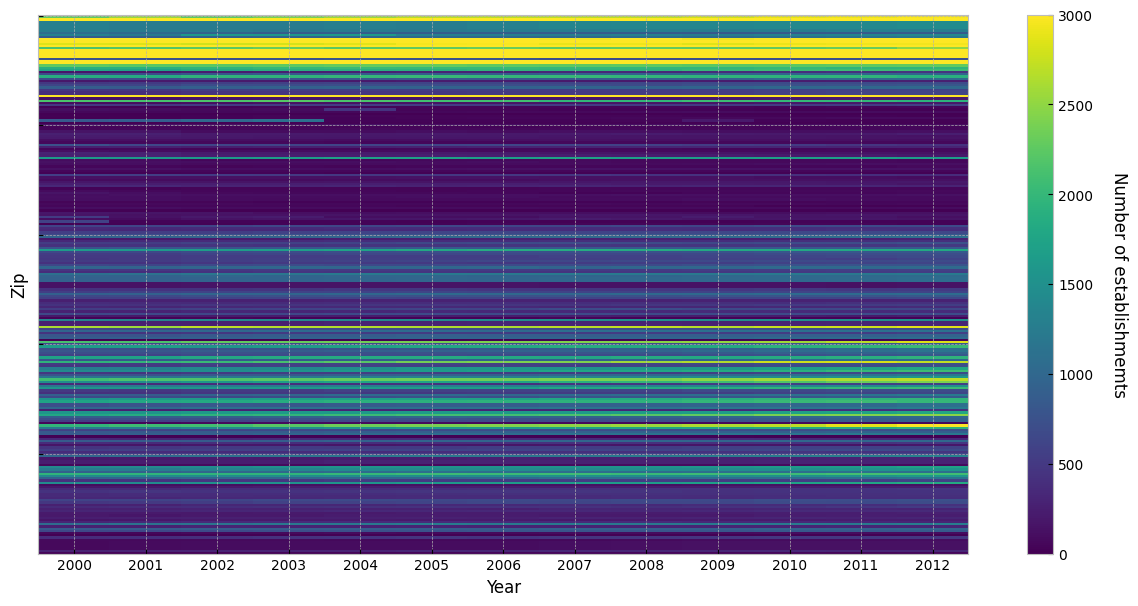

In [ ]:
nyc = pd.read_csv(fname)
nyc=nyc.set_index("zip")
cols = nyc.columns[:-2]
nyc = nyc[cols]

# -- initialize the figure
fig, ax = plt.subplots(figsize=(15, 7))

# -- plot all time series with a "heatmap"
im= ax.imshow(nyc, aspect="auto",interpolation="nearest",clim=(0,3000))

# # -- set the x-axis ticks to be years
xt = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
ax.set_xticks(xt)
ax.set_xticklabels(years[xt])
ax.set_yticklabels("")

# # -- set the axis labels
ax.set_xlabel("Year")
ax.set_ylabel("Zip")

# # -- set the colorbar and label
cbar = fig.colorbar(im)
cbar.ax.set_ylabel("Number of establishmemts", rotation=270)
cbar.ax.get_yaxis().labelpad = 25

# -- show the figure
fig.show()

<b> Is this heat map informative?  Why or why not?  What information can you glean from it? </b>

The heatmap is informative but only to a certain extent. The heatmap is plotted with the original data which has not been standardized. Our primary objective is to observe is the difference in number of establishments over time which isn't clearly depicted here. Hence a heatmap generated with standardized data would be more informative. From the above heatmap some zips have high number of establishments throughout whereas few have low establishments throughout the time period.

<b> Standardize the NYC values across features (time steps).  Generate a new heatmap with color limits -2 to 2. </b>

In [ ]:
nyc_st = nyc.sub(nyc.mean(axis=1),axis=0).div(nyc.std(axis=1),axis=0) #.sub-subtract, .div-divide

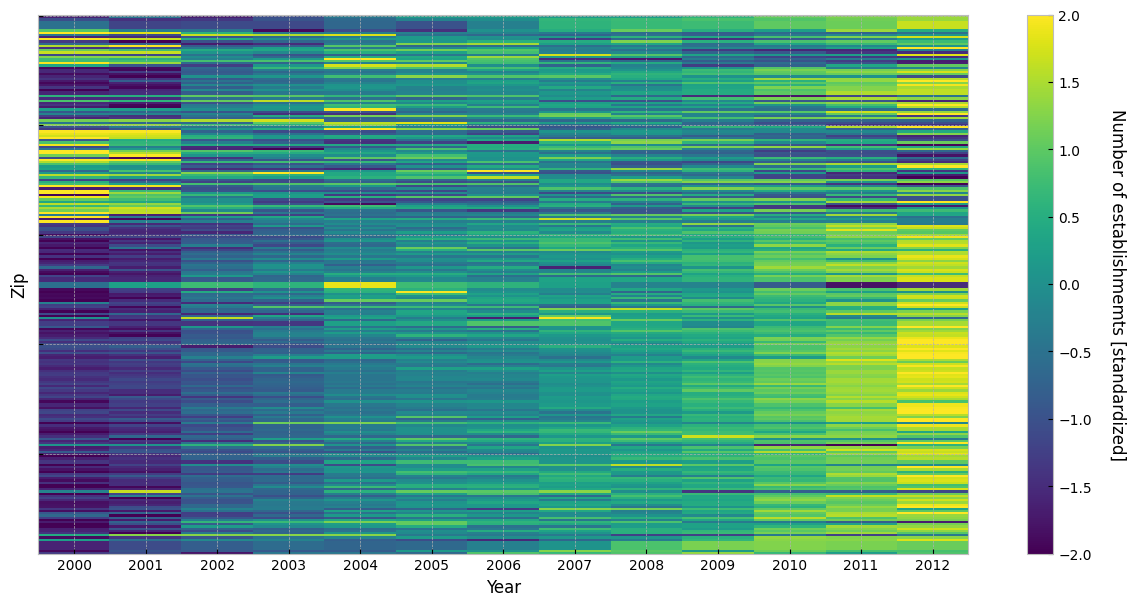

In [ ]:
# -- initialize the figure
fig, ax = plt.subplots(figsize=(15, 7))

# -- plot all time series with a "heatmap"
im= ax.imshow(nyc_st, aspect="auto",interpolation="nearest",clim=(-2,2))

# # -- set the x-axis ticks to be years
xt = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
ax.set_xticks(xt)
ax.set_xticklabels(years[xt])
ax.set_yticklabels("")

# # -- set the axis labels
ax.set_xlabel("Year")
ax.set_ylabel("Zip")

# # -- set the colorbar and label
cbar = fig.colorbar(im)
cbar.ax.set_ylabel("Number of establishmemts [standardized]", rotation=270)
cbar.ax.get_yaxis().labelpad = 25

# -- show the figure
fig.show()

<b> Is this NEW heat map informative?  Why or why not?  What information can you glean from it?  Is there a trend across zipcodes that can be discerned here?  Are there multiple trends? </b>

Yes. The new heat map is informative. Here we have standardized the dataframe across years for each zip independently. This helps us compare the value across zips. We can observe the trend. There are trends across zipcodes that can be discerned here. Some of them have an extremely low number of establishments which tend to increase with time and peak at 2012. Some zips have high number of establishments initially which slowly decrease with time. There are multiple trends.

### **PART 2 - Clustering NYC data**

<b> Using scikit-learn's `KMeans` model, cluster the standardized NYC data into 4 clusters setting `random_state` equal to 2. </b>

In [ ]:
feat = nyc_st
km = KMeans(n_clusters=4, random_state=2)
km.fit(feat)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=2)

In [ ]:
nyc_st.head()

,N_est_2000,N_est_2001,N_est_2002,N_est_2003,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012
zip,,,,,,,,,,,,,
10001,0.155006,-0.825917,-1.183307,-1.616738,0.558020,0.116985,0.900202,1.919145,1.333633,0.063757,-0.422902,-0.529359,-0.468526
10002,-1.620916,-0.427828,-1.656798,-1.060254,-0.391946,0.195628,0.213569,0.209084,0.235995,0.612760,1.047833,1.227245,1.415628
10003,-1.051384,-1.422523,-1.358376,-0.955163,-0.625262,-0.208303,-0.015861,0.625614,0.726417,0.854712,0.918860,1.129630,1.381638
10004,-0.501573,-1.187168,-1.099646,-1.114233,-0.662032,-0.997536,-0.253592,0.607049,0.694572,0.738333,1.015489,1.103012,1.657323
10004,-0.501573,-1.187168,-1.099646,-1.114233,-0.662032,-0.997536,-0.253592,0.607049,0.694572,0.738333,1.015489,1.103012,1.657323


In [ ]:
ind = km.labels_ == 0 #index of members in cluster 0
mems = nyc_st[ind]

In [ ]:
mems.T

zip,10001,10023,10024,10028,10041,10055,10105,10128,10282,10314,...,10473,11004,11005,11239,11360,11371,11374,11412,11430,11432
N_est_2000,0.155006,0.376123,-1.898677,-1.591273,-1.716605,-1.236962,-1.343204,-1.098127,-1.714752,-1.488525,...,-1.179742,-2.448019,0.000000,-2.066613,-0.918206,-1.991613,-2.031852,-2.042215,-1.687586,-2.658455
N_est_2001,-0.825917,-0.912953,-1.874736,-2.005418,-2.226099,-1.444453,-0.937119,-1.952462,-1.914807,-1.805175,...,-1.929533,-1.375292,-1.309307,-1.855899,-2.623446,-1.218748,-1.816699,-1.926027,-0.731655,-1.017840
N_est_2002,-1.183307,-1.268561,-0.629823,0.023893,-0.290020,-0.510746,0.078093,-1.401278,-0.743059,-1.160147,...,-0.361788,-0.660140,1.636634,-0.380905,-0.781787,-0.059451,-0.856790,-0.880342,0.654445,-0.821679
N_est_2003,-1.616738,0.109418,0.662972,0.106722,0.117576,0.422961,0.484178,-0.243793,-0.142896,-0.831770,...,0.933307,0.341072,-0.327327,1.094089,0.241357,-0.059451,-0.443035,-0.067031,0.702241,0.034294
N_est_2004,0.558020,1.754102,1.213606,0.769354,0.627070,1.149178,2.108517,0.996370,0.314371,-0.327476,...,0.728818,0.198042,0.327327,1.199446,0.445986,-1.089937,0.086570,0.688186,1.180207,0.230454
N_est_2005,0.116985,1.531847,0.854497,1.307743,0.219475,1.252923,1.296348,1.079048,0.457267,0.528652,...,0.728818,0.126527,-0.327327,0.778019,0.991663,-0.059451,0.781677,0.513905,1.036817,1.032929
N_est_2006,0.900202,-0.023935,0.806615,0.914305,0.728969,0.734197,1.093305,0.031799,0.714480,0.974307,...,0.728818,0.198042,-1.636634,0.567306,0.582405,0.842224,0.665826,0.571999,0.606648,0.533611
N_est_2007,1.919145,-0.735150,0.447506,0.976427,0.321373,1.149178,-0.734076,1.189285,1.686173,1.079857,...,-0.770765,1.056224,1.963961,0.672662,0.582405,0.971035,0.434124,0.223437,0.606648,0.408782
N_est_2008,1.333633,-0.246190,-0.103129,0.520867,0.321373,0.941688,-0.124949,0.500305,0.943114,0.939124,...,-0.429950,0.269557,0.327327,0.040522,0.991663,1.615089,0.185871,0.049156,0.845631,0.212622
N_est_2009,0.063757,-1.268561,0.064456,0.044600,0.321373,-0.199510,-0.327992,0.197154,0.142896,0.563835,...,-0.634439,0.698648,0.000000,-0.170192,0.787034,0.971035,0.665826,0.397718,-0.349282,0.301785


<b> Make a four panel plot <small>(see [this stackoverflow question](https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib) for guidance)</small>, one for each cluster center, showing the cluster center and its members.   Put the number of zipcodes belonging to that cluster as the title of each axis. Make sure to use proper values for the x-axis and axis labels for the axes.</b>

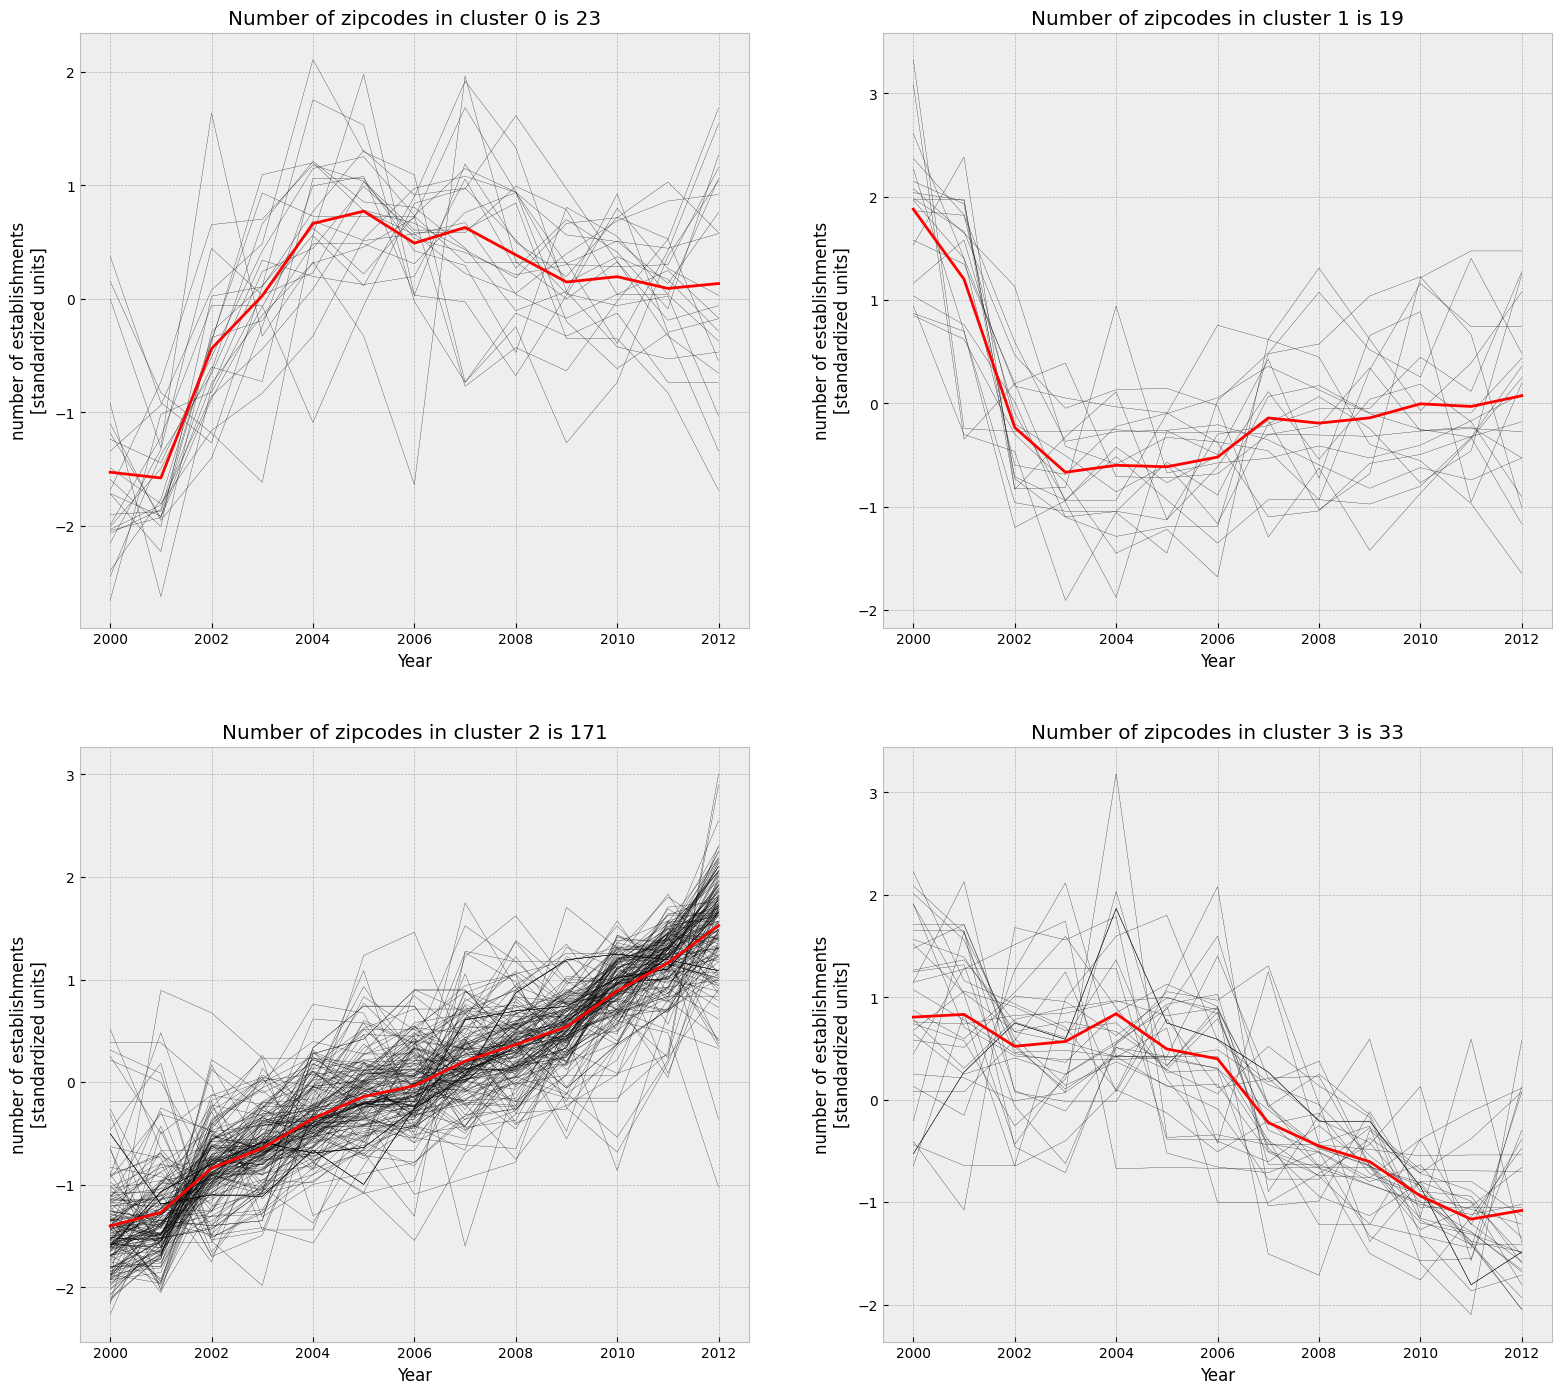

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2,  figsize=[19, 17])
ax1, ax2, ax3, ax4 = axes.flatten()

ind = km.labels_ == 0 #index of members in cluster 0
mems = nyc_st[ind]
ax1.plot(years, mems.T, lw=0.2, color="k")
ax1.plot(years, km.cluster_centers_[0],'r')
ax1.set_xlabel("Year")
ax1.set_ylabel("number of establishments\n[standardized units]")
ax1.set_title("Number of zipcodes in cluster 0 is "+str(len(mems)))


ind = km.labels_ == 1 #index of members in cluster 1
mems = nyc_st[ind]
ax2.plot(years, mems.T, lw=0.2, color="k")
ax2.plot(years, km.cluster_centers_[1],'r')
ax2.set_xlabel("Year")
ax2.set_ylabel("number of establishments\n[standardized units]")
ax2.set_title("Number of zipcodes in cluster 1 is "+str(len(mems)))


ind = km.labels_ == 2 #index of members in cluster 2
mems = nyc_st[ind]
ax3.plot(years, mems.T, lw=0.2, color="k")
ax3.plot(years, km.cluster_centers_[2],'r')
ax3.set_xlabel("Year")
ax3.set_ylabel("number of establishments\n[standardized units]")
ax3.set_title("Number of zipcodes in cluster 2 is "+str(len(mems)))

ind = km.labels_ == 3 #index of members in cluster 3
mems = nyc_st[ind]
ax4.plot(years, mems.T, lw=0.2, color="k")
ax4.plot(years, km.cluster_centers_[3],'r')
ax4.set_xlabel("Year")
ax4.set_ylabel("number of establishments\n[standardized units]")
ax4.set_title("Number of zipcodes in cluster 3 is "+str(len(mems)))

fig.show()

<b> Make a choropleth of the cluster labels with the following steps:

1. Add the cluster labels back to your zipcode business pattern DataFrame, converting them to strings using `.astype(str)` as you do.
2. Load the NYC zipcode shapes from the `mlpp23/data/zipcode_shapes/nyc/` folder using `geopandas`.
3. Merge the zipcode business patterns DataFrame into the zipcode shapes GeoDataFrame.
4. Make a choropleth of the cluster labels using the merged GeoDataFrame's `.plot()` method and setting `cmap` to be a [perceptually uniform sequential](https://matplotlib.org/stable/tutorials/colors/colormaps.html) colormap.

Besure to include a legend for your choropleth.

</b>

In [ ]:
nyc_st_new= nyc_st.reset_index()
nyc_st_new['cluster']=km.labels_
nyc_st_new['cluster']=nyc_st_new['cluster'].astype(str)
nyc_st_new['zip']=nyc_st_new['zip'].astype(str)

In [ ]:
nyc_st_new.head(3)

,zip,N_est_2000,N_est_2001,N_est_2002,N_est_2003,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012,cluster
0,10001,0.155006,-0.825917,-1.183307,-1.616738,0.558020,0.116985,0.900202,1.919145,1.333633,0.063757,-0.422902,-0.529359,-0.468526,0
1,10002,-1.620916,-0.427828,-1.656798,-1.060254,-0.391946,0.195628,0.213569,0.209084,0.235995,0.612760,1.047833,1.227245,1.415628,2
2,10003,-1.051384,-1.422523,-1.358376,-0.955163,-0.625262,-0.208303,-0.015861,0.625614,0.726417,0.854712,0.918860,1.129630,1.381638,2


In [ ]:
zshname = "/content/drive/MyDrive/mlpp23/data/zipcode_shapes/nyc/ZIP_CODE_040114.shp"
zshps = gp.read_file(zshname)
zfull = zshps.merge(nyc_st_new, left_on="ZIPCODE", right_on="zip")

In [ ]:
zfull.head(3)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,...,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012,cluster
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,0.072581,-0.084678,-0.241937,0.072581,0.544359,0.701619,1.173397,1.409286,0.937508,2
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,...,-0.225754,-0.421407,-0.295630,-0.421407,0.081701,0.486983,1.241646,1.227670,1.954382,2
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,...,-0.347979,-0.332850,-0.590052,-0.332850,-0.105907,0.574922,1.361658,1.573472,1.694508,2


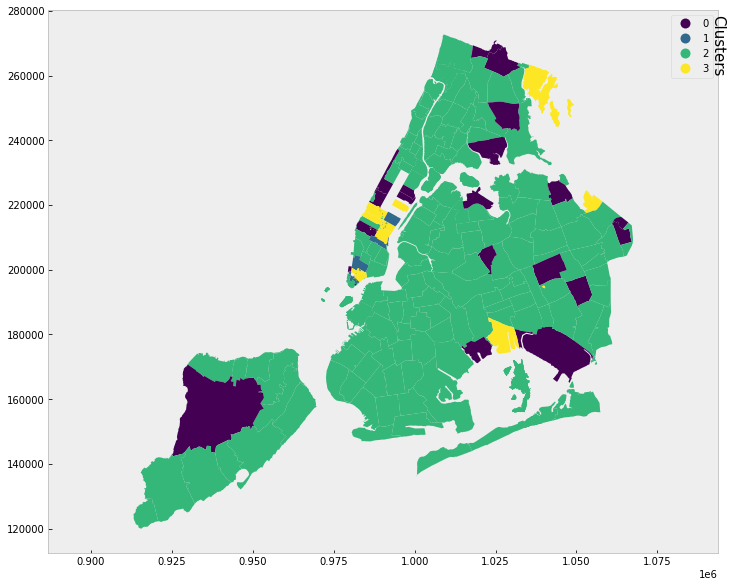

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.grid(False)
zfull.plot("cluster",legend=True,ax=ax, cmap="viridis")
ax.axis("equal")
fig.text(0.9, 0.83, "Clusters",
         fontsize=15, va="center", ha="center", rotation=-90)
fig.show()

<b> Given the shape of the cluster centers, and comparing this with a map of NYC zipcodes to orient yourself spatially, how do you interpret this choropleth?  What does this plot tell you about spatio-temporal trends in the number of businesses in NYC?  What are two possible reasons for the patterns visible in this plot?</b>

From the clustering done for the NYC data, cluster 2 has the maximum number of zipcodes=171. The zipcodes in cluster 2 see an increase in the number of establishments from 2000-2012. Brooklyn falls entirely in cluster 2 which is a indication of significant **gentrification**.   Major of the NYC zipcodes constitutes cluster 2 as indicated by the chloropeth. **This is an indication of the gentrification that has been happening in New York**.  Cluster 3 has 33 zipcodes which observe a decrease in the number of establishments over time and they are majorly located near Long Island and airport. Cluster 0 with 23 zipcodes sees an increase until 2005 and then a steady decline in number of establishments. Cluster 2 with 19 zipcodes, (least number of zipcodes) sees a sharp decline until 2003 and then a slight increase which remains constant.  The cluster data is correlated with the spatio temporal trends. Area near the airport and parks see comparitively lesser number of increase in establishments. The possible reasons for patterns visible is the gentrification that is happening, the significant increase in the number of opportunities.

### **PART 3 - Clustering the full US sample**

<b> Load the pre-cleaned full US zipcode business patterns data (also in the `mlpp23/data/zbp/` folder) into a pandas DataFrame. </b>

In [ ]:
f1name = "/content/drive/MyDrive/mlpp23/data/zbp/all_zbp_est_total_2000_2012_clean.csv"
all = pd.read_csv(f1name)
all=all.set_index("zip")
print(all.columns)
cols = all.columns[:-2]
print(cols)
all_sub = all[cols]
all_sub.shape

Index(['N_est_2000', 'N_est_2001', 'N_est_2002', 'N_est_2003', 'N_est_2004',
       'N_est_2005', 'N_est_2006', 'N_est_2007', 'N_est_2008', 'N_est_2009',
       'N_est_2010', 'N_est_2011', 'N_est_2012', 'longitude', 'latitude'],
      dtype='object')
Index(['N_est_2000', 'N_est_2001', 'N_est_2002', 'N_est_2003', 'N_est_2004',
       'N_est_2005', 'N_est_2006', 'N_est_2007', 'N_est_2008', 'N_est_2009',
       'N_est_2010', 'N_est_2011', 'N_est_2012'],
      dtype='object')


(31604, 13)

<b> Remove all zipcodes (rows) that have standard deviation equal to 0 across the number of establishments columns. </b>


In [ ]:
all_sub["sd"]=all_sub.std(axis=1)
all_sub=all_sub[all_sub["sd"]>0]
all_sub = all_sub.drop('sd', axis=1)
all_sub.shape

<ipython-input-21-d520b2210503>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_sub["sd"]=all_sub.std(axis=1)


(31558, 13)

In [ ]:
std_data=all[cols].std(axis=1)
all_subset= all[std_data>0]

In [ ]:
all_sub.head()

,N_est_2000,N_est_2001,N_est_2002,N_est_2003,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012
zip,,,,,,,,,,,,,
1001,493,490,490,505,500,509,509,503,477,458,448,436,453
1002,563,587,566,586,584,589,582,596,584,571,570,558,572
1003,13,13,15,16,15,12,12,16,17,16,16,16,15
1005,86,90,94,93,97,94,98,106,97,87,96,91,94
1007,219,228,212,230,232,225,238,243,246,230,238,217,217


<b> Now standardize the timeseries across features (time steps). </b>

In [ ]:
all_st = all_sub.sub(all_sub.mean(axis=1),axis=0).div(all_sub.std(axis=1),axis=0)

<b> Cluster the standardized US timeseries into 2 clusters with `random_state` equal to 2. </b>

In [ ]:
feat = all_st
km = KMeans(n_clusters=2, random_state=2)
km.fit(feat)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=2)

<b> Plot the two clusters on the same line plot in dodgerblue (cluster 0) and crimson (cluster 1).  Make sure to use proper values for the x-axis, axis labels for the axes, and include a legend. </b>


In [ ]:
km.cluster_centers_

array([[-1.14308267, -1.07645082, -0.65212936, -0.50966802, -0.1914529 ,
         0.09514935,  0.35183402,  0.76760452,  0.66136821,  0.43497211,
         0.42848336,  0.35397477,  0.47939744],
       [ 0.65494989,  0.55598751,  0.54808133,  0.44619558,  0.4577541 ,
         0.38755317,  0.2617824 ,  0.11271591, -0.22368206, -0.60837124,
        -0.73519269, -0.92507922, -0.93269469]])

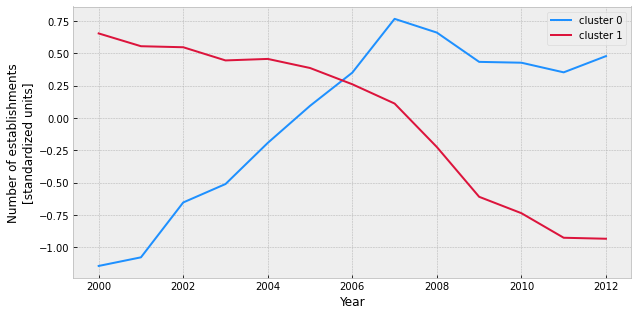

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(years,km.cluster_centers_[0],color="dodgerblue")
ax.plot(years,km.cluster_centers_[1],color='crimson')
ax.set_xlabel("Year")
ax.set_ylabel("Number of establishments\n[standardized units]")
ax.legend(["cluster 0", "cluster 1"])
fig.show()

<b> Extract the latitude and longitude of the US zipcodes from the original US dataframe and make a scatter plot of the longitude (x) and latitude (y) values with the following characteristics:

  1. set the figsize to be square (15x15)
  2. set the facecolor of the axis to be lightgray
  3. set the markersize to be 2
  4. set the zipcodes that are labeled as being in cluster 0 to be dodgerblue in color
  5. set the zipcodes that are labeled as being in cluster 1 to be crimson in color
  6. set the alpha values of the points to be 0.5
  7. set the axis xlims to be -130 to -65
  8. set the axis ylims to be 20 to 60

  
 </b>

In [ ]:
ind0 = km.labels_ == 0 #index of members in cluster 0
mems0 = all_subset[ind0]

ind1 = km.labels_ == 1 #index of members in cluster 3
mems1 = all_subset[ind1]


In [ ]:
len(km.labels_)

31558

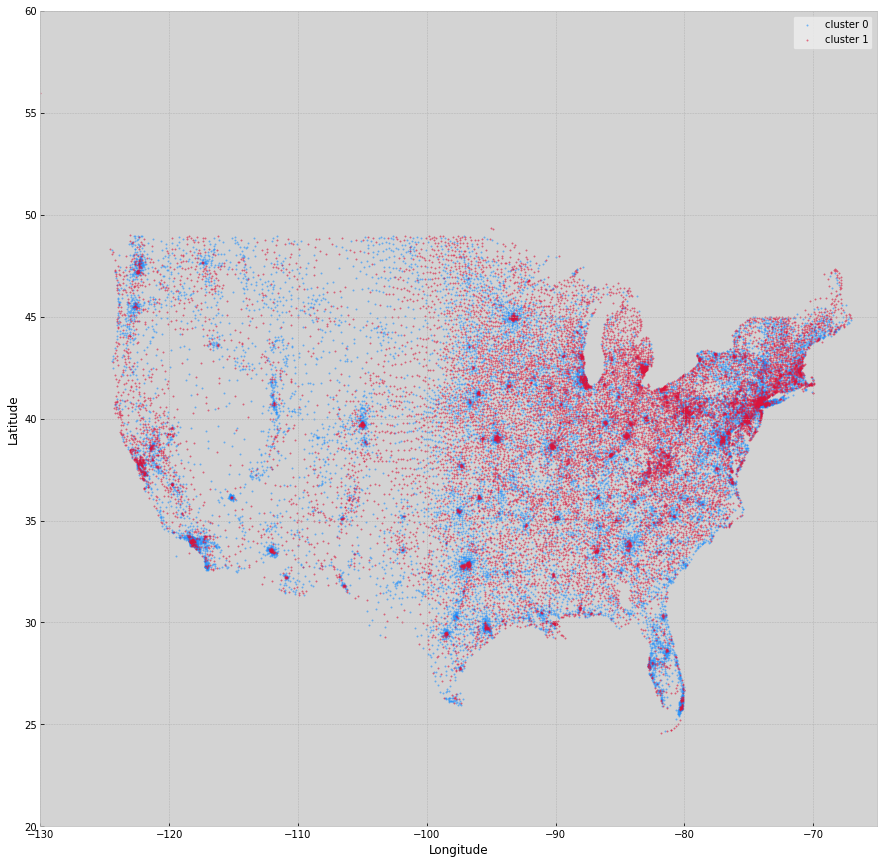

In [ ]:
all = pd.read_csv(f1name)
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_facecolor('lightgray')
ax.scatter(mems0["longitude"], mems0["latitude"], alpha=0.5,s=2,c="dodgerblue" )
ax.scatter(mems1["longitude"], mems1["latitude"], alpha=0.5,s=2,c="crimson" )
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(["cluster 0", "cluster 1"])
ax.set_xlim((-130,-65))
ax.set_ylim((20,60))
fig.show()

<b> What can you say about where the number of business saw a period of increase prior to 2008 vs where the number of businesses have been steadily declining since 2000? </b>

Cluster 1 has zipcodes where number of businesses have been steadily declining since 2000. It is mostly saturated on the northern and eastern side with a few clustered at some points in the state  Cluster 0 has businesses which saw a period of increase prior to 2008. These points are spread out across the United states and a few of them concentrated near the south and west. 2008 financial crisis that hit the US affected small businesses harder than large firms. This is indicative of the recession in the early 2000s and the great depression in 2008 which hit the US economy. In numbers of jobs lost during the Great recession California was followed by Florida, Illinois, Ohio, and Michigan.

### **PART 4 - Context and Conclusions**

<b>

  <u>In your own words</u>, discuss (in ~500 words) the zipcode business patterns data (how and why they are collected, what information the raw data contains, how the data has been used by researchers, limitation, <i>etc</i>.) <u>in the context of your results above</u>.  This should include a qualitative description of your models and results that would be understandable but informative for a policy maker who is looking to use these in the context of decision making.  Please include *references* within the description via weblinks.

</b>

Zipcode business pattern data refers to information on the number of businesses, employment, and payroll in a specific geographic area, typically a zip code. This data provides insights into the economic activity of a region and can be useful for businesses, policymakers, and researchers.

The data is often collected by government agencies such as the US Census Bureau and is accessed through their websites or other data providers. Some common metrics in the data include the number of establishments, employment by industry, average wages, and the number of new business startups. This data is useful for identifying trends and opportunities in a particular area and can inform decisions related to business development and economic policy.[Link](https://employstats.com/wanna-know-how-many-and-what-types-of-business-there-are-in-a-particular-county-see-the-u-s-county-business-patterns-data-at-the-u-s-census/) [Data](https://catalog.data.gov/dataset/annual-economic-surveys-business-patterns-zipcode-business-patterns-cf7dd)

The US Census Bureau collects and provides access to zipcode business pattern data through its Annual Business Survey and the County Business Patterns program.The ABS collects data on business establishments across all sectors of the economy, including information on employment, payroll, and revenue, as well as characteristics such as ownership and industry classification. The CBP program provides annual data on the number of business establishments, employment, and payroll by industry for all counties and metro areas in the United States.  [CBP](https://www.census.gov/programs-surveys/cbp.html)

The data analysed by us has been collected by the US Census Bureau. It has information of the zips and the number of establishments across entire United States and NewYork from 200-2012 . It also has latitude and longitude data [Data](https://www.census.gov/data/developers/data-sets/cbp-nonemp-zbp/zbp-api.html)

Limitations : The data may not be granular enough to provide a complete picture of the economic activity in a particular area. The data provides information on the number of businesses in a zip code, but it does not provide insights into the specific types of businesses or the size of those businesses.Furthermore, the data may not be representative of the entire population within a zip code, as it may only include data from businesses that have registered with the government or meet certain reporting criteria. This can result in underestimation or overestimation of economic activity in a given area.[Limitation](https://carto.com/blog/zip-codes-spatial-analysis)

The models generated above involve clustering of the NYC zipcode businesses data into 4 clusters. The 4 clusters are formed based on the temporal trends of the number of establishments. While some clusters saw a steady decline in number of establishments, some also saw an increase. The clusters were then mapped to the area in NYC by a chloropeth. By this we could observe the location of the four clusters generated. This is indication of the gentirifcation that has been happening in New York.The increase or decrease in establishments can be influenced by multiple factors like employment opportunities, weather, location. etc.

The entire US zipcode business data was also clustered majorly into 2 clusters and the pattern observed in the 2 clusters involved the number of business that saw a period of increase prior to 2008 and another cluster where the number of businesses have been steadily declining since 2000. Recession that hit the US economy in the early 2000s and Great Recession in 2008 also has significant impact on the number of establishments.

---

### **EXTRA CREDIT: choosing *k* for NYC**

<b> Use the "elbow method" to determine an appropriate value for k for NYC.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

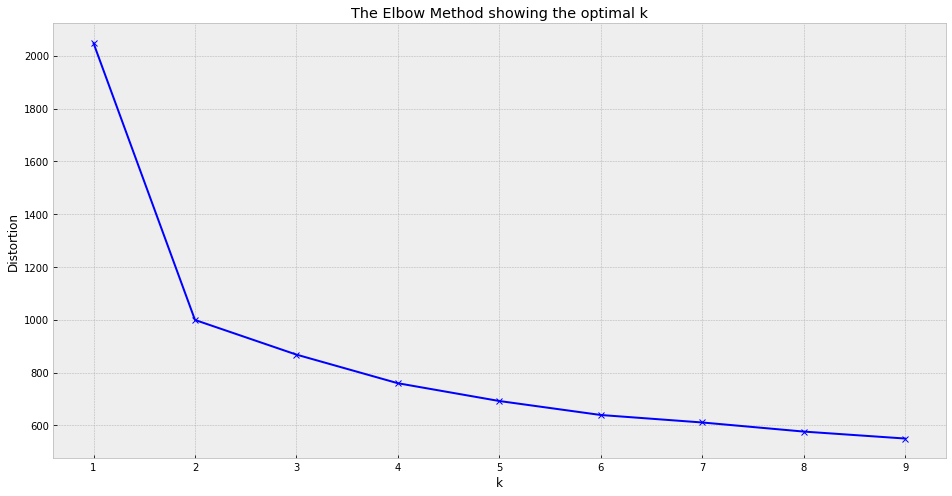

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(nyc_st)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the elbow method the optimal number of clusters for the data is 3.